The number of rows and columns of data: (418, 12)
The number of elements: 5016

The Places where the Titanic Passengers Embarked are:
1.Queenstown
2.Southampton
3.Cherbourg
-> Q
-> S
-> C


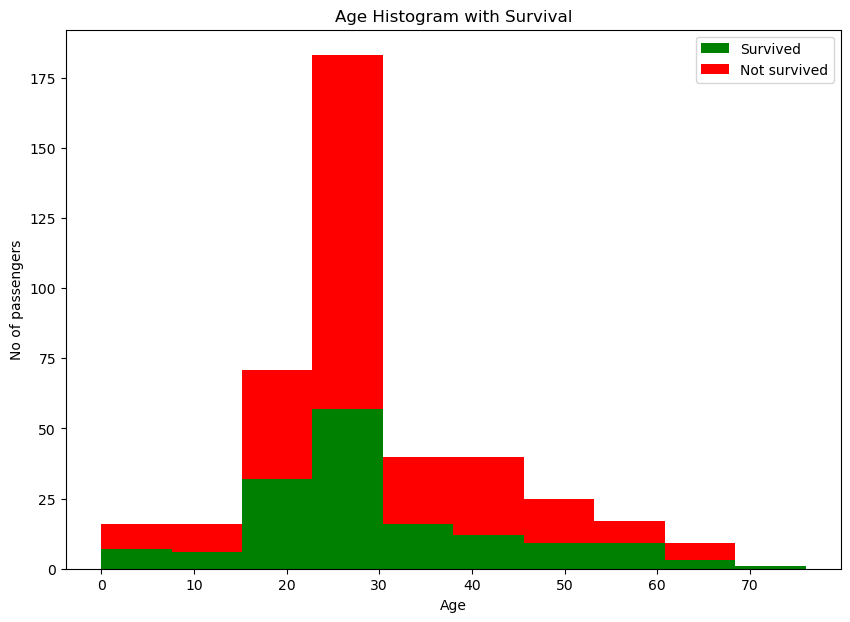

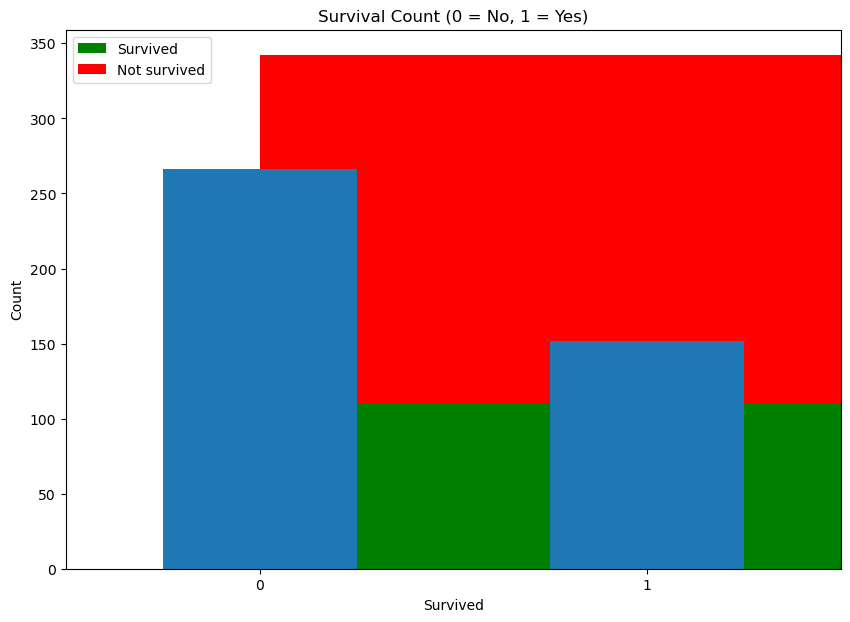

0    266
1    152
Name: Survived, dtype: int64

The selected data for Logistic Regression:
      Pclass  Sex  Age  SibSp  Parch  Fare  Embarked
0         3    0   34      0      0     7         0
1         3    1   47      1      0     7         1
2         2    0   62      0      0     9         0
3         3    0   27      0      0     8         1
4         3    1   22      1      1    12         1
..      ...  ...  ...    ...    ...   ...       ...
413       3    0   30      0      0     8         1
414       1    1   39      0      0   108         2
415       3    0   38      0      0     7         1
416       3    0   30      0      0     8         1
417       3    0   30      1      1    22         2

[418 rows x 7 columns]

Logistic regression accuracy after the model building = 94.06%


In [1]:
#Titanic Survival Prediction Project

#1.IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


#2.IMPORTING CSV FILES
df= pd.read_csv('titanic.csv')
df

df.head(10)
df.tail()
print('The number of rows and columns of data:',df.shape)
print('The number of elements:',df.size)
df.describe()
df.isnull().sum
df.dtypes

df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())
Embarked = df['Embarked'].unique()

print()
print('The Places where the Titanic Passengers Embarked are:')
print('1.Queenstown\n2.Southampton\n3.Cherbourg')

for Embarkeds in Embarked:
    print("->",Embarkeds)

    
df['Embarked'] = df['Embarked'].map( {'Q': 0,'S':1,'C':2}).astype(int)
df['Sex'] = df['Sex'].map( {'female': 1,'male':0}).astype(int)
df.dtypes

df['Age'] = df['Age'].astype(int)
df['Fare'] = df['Fare'].astype(int)
data = df.drop(['PassengerId','Name','Cabin','Ticket'],
                axis =1,
                inplace=True)
df.head()

#3.DATA VISUALIZATION

#3a)Age histogram with survival

fig = plt.figure(figsize =(10, 7))
plt.hist(x = [df[df['Survived']==1]['Age'],
             df[df['Survived']==0]['Age']],
             stacked=True,
             color = ['g','r'],
             label = ['Survived','Not survived'])

plt.title('Age Histogram with Survival')
plt.xlabel('Age')
plt.ylabel('No of passengers')

plt.legend()

#3b)Fare histogram with survival

fig = plt.figure(figsize =(10, 7))
plt.hist(x = [df[df['Survived']==1]['Fare'],
             df[df['Survived']==0]['Fare']],
             stacked=True,
             color = ['g','r'],
             label = ['Survived','Not survived'])

plt.title('Fare Histogram with Survival')
plt.xlabel('Fare')
plt.ylabel('No of passengers')

plt.legend()

#3C)bar chart to count the number of people survived
 
column = 'Survived'

survival_counts = df[column].value_counts()
survival_counts.plot(kind='bar', rot=0)

plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survival Count (0 = No, 1 = Yes)')

plt.show()
    
print(survival_counts)

#4.Data splitting and Data selection
Train = df.drop(['Survived'], axis=1)
print()
print('The selected data for Logistic Regression:\n',Train)
Test = df.iloc[:,1]
x_train, x_test, y_train, y_test = train_test_split(Train,Test,test_size = 0.24,random_state = 1)


#5.Model Building
LR = LogisticRegression(solver='liblinear', max_iter=200)
LR.fit(x_train, y_train)
y_pred = LR.predict(x_test)
LRAcc = accuracy_score(y_pred,y_test)
print()
print('Logistic regression accuracy after the model building = {:.2f}%'.format(LRAcc*100))